In [3]:
pip install -U scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 6.9 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894075 sha256=95bd25bb7adc3e7b10c8663ff01cd6cd309168cdbce002421cf5e062d7577e52
  Stored in directory: /Users/apple/Library/Caches/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [19]:
quality = ctrl.Antecedent(np.arange(11), 'quality')
service = ctrl.Antecedent(np.arange(11), 'service')
tip = ctrl.Consequent(np.arange(26), 'tip')
tip

Consequent: tip

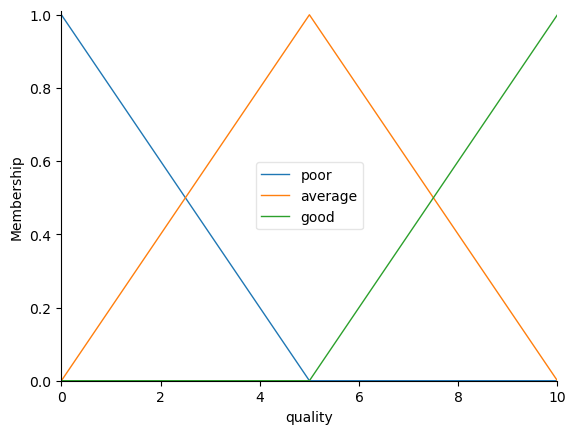

In [20]:
quality.automf(3)
quality.view()


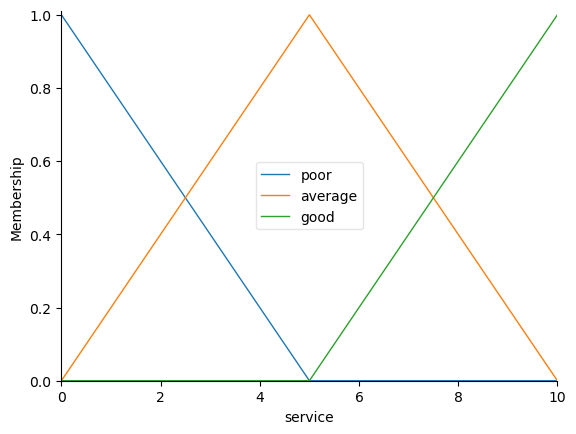

In [21]:
service.automf(3)
service.view()

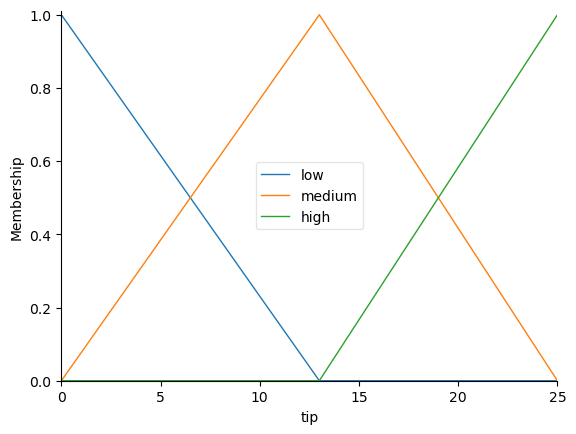

In [22]:
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])
tip.view()

In [23]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])


In [25]:
tip_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tip_ctrl)

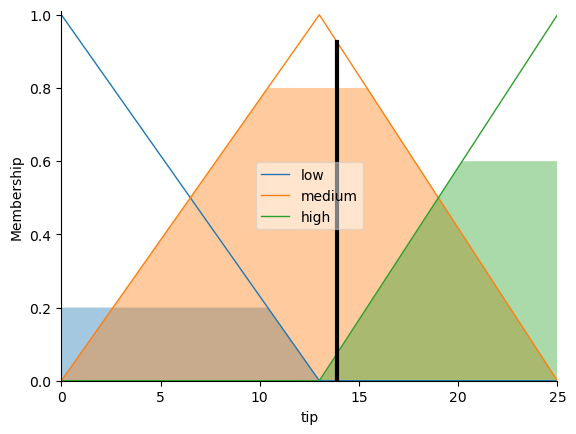

In [27]:
tipping.input['quality'] = 8
tipping.input['service'] = 4

# Crunch the numbers
tipping.compute()
tip.view(sim=tipping)

In [29]:
print (tipping.output['tip'])

13.882743790990219
